In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
xrange = (-1, 2)
n = 100

In [28]:
rng = np.random.default_rng()
x = np.sort(rng.uniform(*xrange, 100))
#x = rng.uniform(*xrange, 100)
noise = rng.uniform(-0.1, 0.1, 100)
y = np.sin(np.pi*x/2) + noise

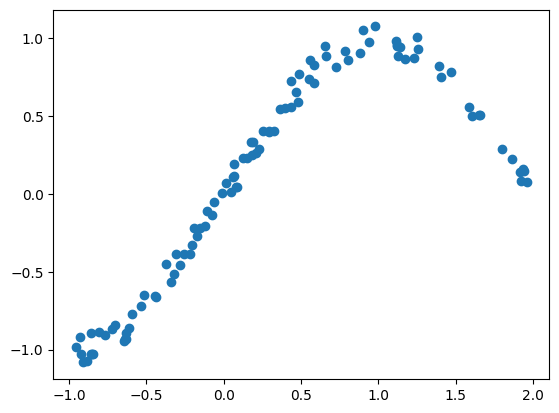

In [29]:
fig1, ax1 = plt.subplots(1) 
ax1.plot(x, y, 'o')

In [30]:
p = np.polynomial.polynomial.Polynomial.fit(x, y, 2)
p.coef

array([ 0.59167598,  0.86776412, -1.13575591])

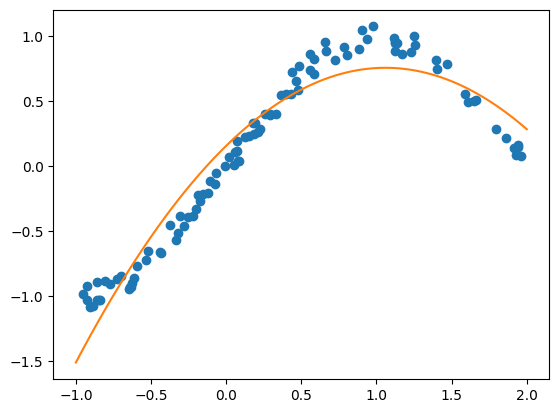

In [31]:
xs = np.linspace(*xrange, 100)
ys = p(xs)
ax1.plot(xs, ys)
fig1

In [32]:
mse = lambda x, y : ((x - y)**2).mean()

In [33]:
print(mse(y, p(x)))

0.03286500494025721


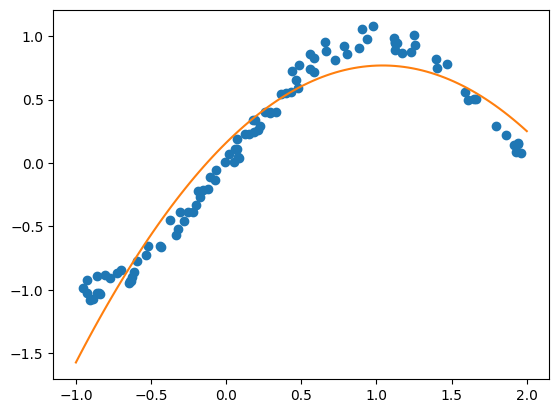

In [34]:
xtrn,  ytrn = x[:80], y[:80]
xtst, ytst = x[80:], y[80:]
ptrn = np.polynomial.polynomial.Polynomial.fit(xtrn, ytrn, 2)
fig2, ax2 = plt.subplots(1)
ax2.plot(x, y, 'o', xs, ptrn(xs))

In [35]:
print("training error :", mse(ytrn, ptrn(xtrn)))

training error : 0.03224911240075142


In [36]:
print("test error :", mse(ytst, ptrn(xtst)))

test error : 0.03791686127989845


In [37]:
def fit_model(x, y, n):
    m = x.size
    mtrn = (np.trunc(0.8*m)).astype(int)
    p = np.polynomial.polynomial.Polynomial.fit(x[:mtrn], y[:mtrn], n)
    etrn = mse(y[:mtrn], p(x[:mtrn]))
    etst = mse(y[mtrn:], p(x[mtrn:]))
    return p, etrn, etst
    


In [38]:
fit_model(x, y, 3)

(Polynomial([ 0.64451426,  1.52911776, -1.22370657, -0.99647122], domain=[-0.95525264,  1.96052255], window=[-1.,  1.], symbol='x'),
 np.float64(0.006152264605586834),
 np.float64(0.005638222154496048))

In [53]:
N = 10
etrn = np.zeros(N)
etst = np.zeros(N)
for n in range(N):
    p, etrn[n], etst[n] = fit_model(x, y, n)


In [54]:
import pandas as pd
print(pd.DataFrame(data = {'mse_train': etrn, 'mse_test': etst}))

    mse_train  mse_test
0    0.418231  0.614386
1    0.178053  0.139399
2    0.032249  0.037917
3    0.006152  0.005638
4    0.002964  0.004592
5    0.002868  0.004093
6    0.002833  0.004246
7    0.002780  0.004684
8    0.002766  0.004784
9    0.002760  0.004713
10   0.002760  0.004706
11   0.002743  0.004512
12   0.002743  0.004526
13   0.002735  0.004728
14   0.002734  0.004805
15   0.002734  0.004818
16   0.002718  0.004867
17   0.002695  0.004889
18   0.002549  0.004232
19   0.002547  0.004379


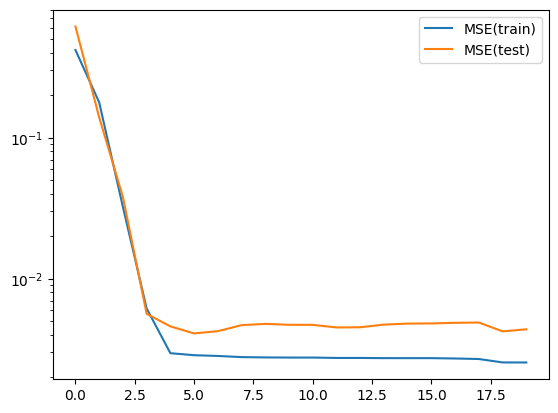

In [55]:
plt.plot(range(N), etrn, range(N), etst)
plt.yscale("log")
plt.legend(["MSE(train)", "MSE(test)"])

In [56]:
etrn = np.zeros(N)
evld = np.zeros(N)
p = [None for _ in range(N)]
for n in range(10):
    p[n], etrn[n], evld[n] = fit_model(xtrn, ytrn, n)

In [57]:
print(pd.DataFrame(data = {'mse_train': etrn, 'mse_test': etst}))

    mse_train  mse_test
0    0.394409  0.614386
1    0.182882  0.139399
2    0.033180  0.037917
3    0.006485  0.005638
4    0.003031  0.004592
5    0.002757  0.004093
6    0.002722  0.004246
7    0.002572  0.004684
8    0.002569  0.004784
9    0.002540  0.004713
10   0.000000  0.004706
11   0.000000  0.004512
12   0.000000  0.004526
13   0.000000  0.004728
14   0.000000  0.004805
15   0.000000  0.004818
16   0.000000  0.004867
17   0.000000  0.004889
18   0.000000  0.004232
19   0.000000  0.004379


In [58]:
print(mse(ytst, p[4](xtst)))

0.004592411762849805


In [59]:
print(mse(ytst, p[5](xtst)))

0.00389993713084442
